# Hand Written Digits Recognition 


## importing libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #help us to stack layers one by one
from tensorflow.keras.layers import Dense, Flatten #Dense - Fully connected layers, Flatten - Convert 2d images into 1d (28x28-> 784)
from tensorflow.keras.datasets import mnist # Built in dataset of handwritten digits

## Loading and Preprocessing the data


In [4]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()#(image,label)

# x_train and x_test are images of 28x28 grayscale
# y_train and y_test are labels from 0-9

# ''' Each image contains 28x28 grayscale images-> 784 pixels 
# Each pixel has value between 0-255 
# where 0 represents black (0-> Black)
# and 255 represnts white (255-> White)'''

# ''' Giving large values like 227,74 may mess up the training
# Neural Network Works better when there is small inputs'''

# ''' /255 results
# 0-> Black
# 0.5-> Grey
# 1-> White'''

## Normalize the images (0-255 → 0-1)
x_train=x_train/255 # 
x_test=x_test/255


## Building the Neural Network

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)), 
    Dense(128, activation="relu"), 
    Dense(10, activation="softmax")
])
''' Flatten Converts the 28x28 into 784 (1D Array) input neurons
    Dense create a layer of 128 neurons with activation function Relu this 
    This layer learns patterns, combinations of pixels, etc.
        Relu Function is used for keeping only positive values and neglecting negative ones
    Dense with Softmax function create a layer of output with 10 Neurons coz there are 10 digits(0-9)
    Softmax converts raw output to probabilities (0 to 1) whose sum is 1
    Example: If the model sees a 3, it might output:
    [0.01, 0.02, 0.05, 0.87, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
    Means: 87% sure it's a "3" 
    Sequential([...])
    This tells TensorFlow:
    “Hey! Build this model step-by-step — from top to bottom — one layer after another.”
    '''
'''
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax")
])
'''

C:\Users\Yash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


'\nmodel=Sequential([\n    Flatten(input_shape=(28,28)),\n    Dense(128,activation="relu"),\n    Dense(10,activation="softmax")\n])\n'

## Compiling the Model

In [6]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Training the model

In [7]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8738 - loss: 0.4451
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9619 - loss: 0.1261
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9756 - loss: 0.0807
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9819 - loss: 0.0595
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0423


# Evaluate the model

In [8]:
loss, accuracy= model.evaluate(x_test,y_test)
print("Test Accuracy: ",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.0846
Test Accuracy:  0.9772999882698059


# Showing The Image

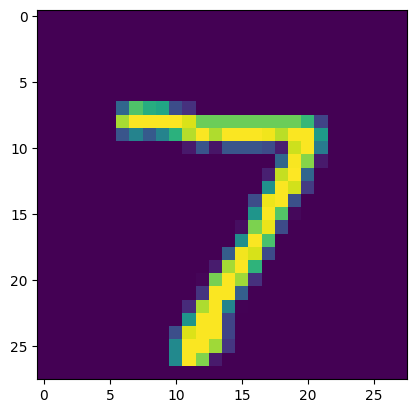

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0])

# Making A Prediction

In [11]:
prediction= model.predict(x_test[:1]) #2d array
#gives probabibility of predicted digits
'''
    2d array, outer list = images
              inner list = probabilities for digits 0-9
     prediction = [[0.01, 0.02, 0.10, 0.03, 0.02, 0.01, 0.05, 0.65, 0.01, 0.10]]
'''
'''x_test[:1] is like accesing zeroth element via slicing
   x_test[img1,img2,img3,....]

'''
predicted_digit = tf.argmax(prediction[0]).numpy()  
print("predicted digit: ", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
predicted digit:  7


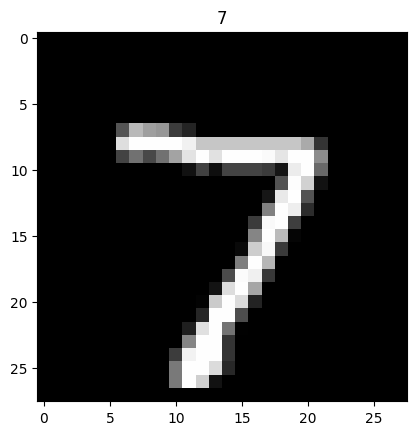

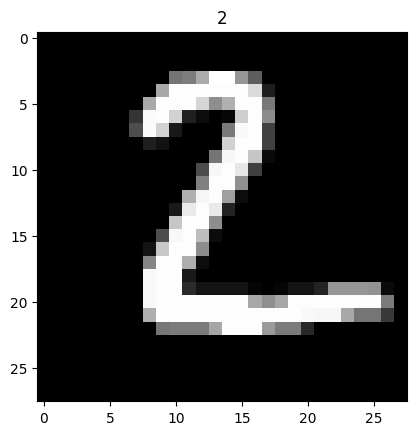

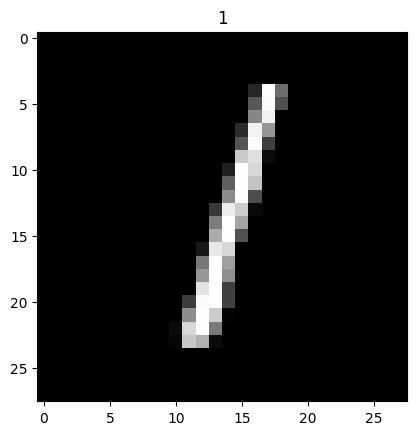

In [12]:
for i in range(3):
    plt.figure()
    plt.imshow(x_test[i],cmap="grey")
    plt.title(y_test[i])

In [14]:
prediction=model.predict(x_test[0:3])
predicted_digit=tf.argmax(prediction[2]) 
''' To avoid 
Predicted Digit is: tf.Tensor(1, shape=(), dtype=int64)
this type of output we convert the value using numpy'''
print("Predicted Digit is:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Digit is: tf.Tensor(1, shape=(), dtype=int64)


In [16]:
prediction=model.predict(x_test[0:3])
predicted_digit=tf.argmax(prediction[2]).numpy()
print("Predicted Digit is: ",predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Digit is:  1


In [18]:
probability = prediction[2][predicted_digit] 
'''Here we are accesing the probability of predicted digit, actually prediction is 2d array with outer list as images and inner list as their probability of digits'''
print("predicted_digit for 3rd image is: ", predicted_digit, "with probabilty: ", probability)

predicted_digit for 3rd image is:  1 with probabilty:  0.9996319


In [20]:
prediction = model.predict(x_test[0:3])
for i in range(0, 3):
    predicted_digit = tf.argmax(prediction[i]).numpy() 
    '''Its a single digit (a number)'''
    probability = prediction[i][predicted_digit] 
    '''Here we are accesing the probability of predicted digit, actually prediction is 2d array with outer list as images and inner list as their probability of digits'''
    print(f"Predicted Digit for the {i}th image is {predicted_digit} with probability {probability:}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Digit for the 0th image is 7 with probability 0.9997062087059021
Predicted Digit for the 1th image is 2 with probability 0.999879002571106
Predicted Digit for the 2th image is 1 with probability 0.9996318817138672


In [21]:
''' 
    datatype of each variable?
Let me show you all that one by one:

🧾 x_test
📦 Type: numpy.ndarray

📐 Shape: (10000, 28, 28)

10,000 test images, each of 28x28 pixels.

📘 What’s inside: grayscale images of digits (pixel values from 0–255 or 0–1)

🧾 x_test[:1]
📦 Type: numpy.ndarray

📐 Shape: (1, 28, 28)

💡 Still an array, but only containing 1 image.

This is done to simulate a batch — models expect batch inputs.

🧾 prediction
📦 Type: numpy.ndarray

📐 Shape: (1, 10)

🔢 Why 10? Because we have 10 possible digits (0–9)

This array contains probabilities for each digit.

Example:

python
Copy
Edit
[[0.01, 0.02, 0.10, 0.03, 0.02, 0.01, 0.05, 0.65, 0.01, 0.10]]
→ Highest probability is at index 7, so model thinks it’s a 7!

🧾 prediction[0]
📦 Type: numpy.ndarray

📐 Shape: (10,)

👉 It's a single row (just the 10 probability scores)

🧾 tf.argmax(prediction[0])
📦 Type: Tensor

🧮 Meaning: It picks the index where the probability is highest

Example: if prediction[0] = [0.1, 0.3, 0.6, 0.0, ...] → result is 2

🧾 tf.argmax(...).numpy()
📦 Type: int

Final converted number (regular Python integer)

This is the predicted digit by the model
'''

" \n    datatype of each variable?\nLet me show you all that one by one:\n\n🧾 x_test\n📦 Type: numpy.ndarray\n\n📐 Shape: (10000, 28, 28)\n\n10,000 test images, each of 28x28 pixels.\n\n📘 What’s inside: grayscale images of digits (pixel values from 0–255 or 0–1)\n\n🧾 x_test[:1]\n📦 Type: numpy.ndarray\n\n📐 Shape: (1, 28, 28)\n\n💡 Still an array, but only containing 1 image.\n\nThis is done to simulate a batch — models expect batch inputs.\n\n🧾 prediction\n📦 Type: numpy.ndarray\n\n📐 Shape: (1, 10)\n\n🔢 Why 10? Because we have 10 possible digits (0–9)\n\nThis array contains probabilities for each digit.\n\nExample:\n\npython\nCopy\nEdit\n[[0.01, 0.02, 0.10, 0.03, 0.02, 0.01, 0.05, 0.65, 0.01, 0.10]]\n→ Highest probability is at index 7, so model thinks it’s a 7!\n\n🧾 prediction[0]\n📦 Type: numpy.ndarray\n\n📐 Shape: (10,)\n\n👉 It's a single row (just the 10 probability scores)\n\n🧾 tf.argmax(prediction[0])\n📦 Type: Tensor\n\n🧮 Meaning: It picks the index where the probability is highest\n\nE